In [2]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd

In [3]:
# Create a reference the CSV file desired
csv_path1 = "clinicaltrial_data.csv"
csv_path2 = "mouse_drug_data.csv"

# Read the CSV into a Pandas DataFrame
trial_df = pd.read_csv(csv_path1)
drug_df = pd.read_csv(csv_path2)

# Print the first five rows of data to the screen
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
data_complete = pd.merge(trial_df, drug_df, how="outer", on=["Mouse ID", "Mouse ID"])
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
#This is the calculated Error
tumor_meta_sem = data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
tumor_meta_sem = pd.DataFrame(tumor_meta_sem)
tumor_meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [6]:
#Sort table by Double Index

tumor_meta_mean = pd.DataFrame(data_complete.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
#tumor_vol_mean = pd.DataFrame(drug_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
tumor_meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
#This is the calculated Error
tumor_meta_sem = data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
tumor_meta_sem = pd.DataFrame(tumor_meta_sem)
tumor_meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
tumor_meta_sem = tumor_meta_sem.reset_index()
tumor_meta_pivot_sem = tumor_meta_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
tumor_meta_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [9]:
tumor_meta_mean = tumor_meta_mean.reset_index()
tumor_meta_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
tumor_meta_pivot_mean = tumor_meta_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
tumor_meta_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


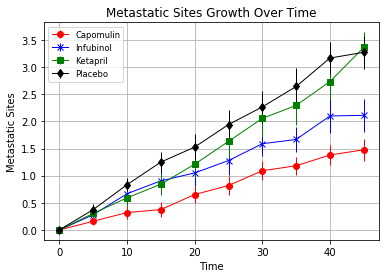

In [11]:
#plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], tumor_vols_pivot_sem)

#plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], tumor_vols_pivot_sem)
            
plt.errorbar(tumor_meta_pivot_mean.index, tumor_meta_pivot_mean["Capomulin"], yerr=tumor_meta_pivot_sem["Capomulin"], color="r", linewidth=1, marker="o")
plt.errorbar(tumor_meta_pivot_mean.index, tumor_meta_pivot_mean["Infubinol"], yerr=tumor_meta_pivot_sem["Infubinol"], color="b", linewidth=1, marker="x")
plt.errorbar(tumor_meta_pivot_mean.index, tumor_meta_pivot_mean["Ketapril"], yerr=tumor_meta_pivot_sem["Ketapril"], color="g", linewidth=1, marker="s")
plt.errorbar(tumor_meta_pivot_mean.index, tumor_meta_pivot_mean["Placebo"], yerr=tumor_meta_pivot_sem["Placebo"], color="k", linewidth=1, marker="d")


plt.title("Metastatic Sites Growth Over Time")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time")
plt.grid(True)
plt.legend(loc="best", fontsize="small",fancybox=True)

plt.savefig("Fig2.jpg")
plt.show()